In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #importing and defining train and test data

Using TensorFlow backend.


In [2]:
#decode the reviews back into english words
word_index = imdb.get_word_index() #dictionnary mapping words to an integer index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #reverses the dictionnary above, i.e. mapping integers to words
def decoded(x): #decoding function for the review x
    print(' '.join([reverse_word_index.get(i-3,'?') for i in train_data[x]])) #decodes the review, i-3 not entirely clear!
    return

In [3]:
reverse_word_index[train_data[0][0]]
decoded(0)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [4]:
#Preparing our data for a neural network, i.e. convert into tensors
import numpy as np
def vectorize_sequences(sequences, dimension=10000): #not entirely clear!
    results = np.zeros((len(sequences), dimension)) #all zero matrix of shape(len(sequences),dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #set specific indices of results[i] to 1
    return results

#vectorize labels
x_train = vectorize_sequences(train_data) #vectorized training data
x_test = vectorize_sequences(test_data) #vectorized test data

#vectorize labels
y_train = np.asarray(train_labels).astype('float32') #vectorized training labels
y_test = np.asarray(test_labels).astype('float32') #vectorized test labels

In [5]:
#defining the model
#not entirely clear, but will be explained later
from tensorflow.keras import models #without writing tensorflow. an error occurs!
from tensorflow.keras import layers #without writing tensorflow. an error occurs!

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
#setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
#training the model
#not entirely clear
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 170us/sample - loss: 0.5253 - acc: 0.7852 - val_loss: 0.4025 - val_acc: 0.8633
Epoch 2/20
15000/15000 [==============================] - 2s 140us/sample - loss: 0.3220 - acc: 0.9015 - val_loss: 0.3149 - val_acc: 0.8852
Epoch 3/20
15000/15000 [==============================] - 2s 152us/sample - loss: 0.2374 - acc: 0.9225 - val_loss: 0.2821 - val_acc: 0.8913
Epoch 4/20
15000/15000 [==============================] - 2s 150us/sample - loss: 0.1895 - acc: 0.9379 - val_loss: 0.2783 - val_acc: 0.8902
Epoch 5/20
15000/15000 [==============================] - 2s 136us/sample - loss: 0.1532 - acc: 0.9510 - val_loss: 0.2854 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 190us/sample - loss: 0.1277 - acc: 0.9601 - val_loss: 0.2835 - val_acc: 0.8877
Epoch 7/20
15000/15000 [==============================] - 2s 134us/sample - loss: 0.1076 - acc: 0.9663 - val_l

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

range(1, 21)


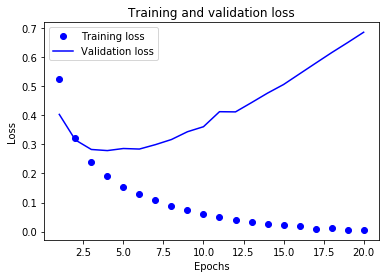

In [11]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)
print(epochs)

plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo means blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b means blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


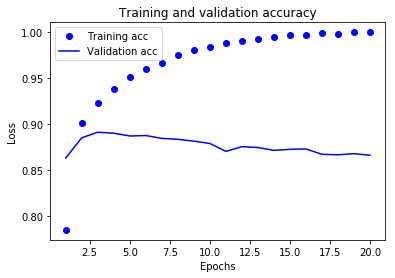

In [10]:
#Plotting the training and validation accuracy
plt.clf() #clearing the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [12]:
#retraining the model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 104us/sample - loss: 0.5353 - accuracy: 0.7706
Epoch 2/4
25000/25000 [==============================] - 2s 100us/sample - loss: 0.3219 - accuracy: 0.9036
Epoch 3/4
25000/25000 [==============================] - 3s 100us/sample - loss: 0.2266 - accuracy: 0.9286
Epoch 4/4
25000/25000 [==============================] - 3s 103us/sample - loss: 0.2889 - accuracy: 0.8862


In [13]:
results

[0.28889627073287966, 0.88616]

In [14]:
model.predict(x_test)

array([[0.19026142],
       [0.99010956],
       [0.9190109 ],
       ...,
       [0.1291691 ],
       [0.08310819],
       [0.53571546]], dtype=float32)